# K-Nearest Neighbors

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [2]:
data = pd.read_csv('data/league_data_cleaned.csv')

data.head()

,matchId,blueTeamControlWardsPlaced_diff,blueTeamWardsPlaced_diff,blueTeamTotalKills_diff,blueTeamDragonKills_diff,blueTeamHeraldKills_diff,blueTeamTowersDestroyed_diff,blueTeamInhibitorsDestroyed_diff,blueTeamTurretPlatesDestroyed_diff,blueTeamFirstBlood_diff,blueTeamMinionsKilled_diff,blueTeamJungleMinions_diff,blueTeamTotalGold_diff,blueTeamXp_diff,blueWin
0,EUW1_6882489515,-4,-11,-12,2,0,-2,0,6,-400,294,-29531,-8690,2559,1
1,EUW1_6882416210,-4,20,-5,1,0,0,0,6,-373,272,-28872,-2468,-6055,0
2,EUW1_6881092720,-1,-222,-5,-1,0,-2,0,8,-340,247,-30414,-1338,-13483,0
3,EUW1_6879405717,3,5,-2,-1,1,1,0,4,-377,268,-25073,-3736,2237,0
4,EUW1_6879389461,-4,4,4,0,1,0,0,2,-382,274,-25952,-1703,11821,1


In [3]:
data.shape

(24218, 15)

In [4]:
X = data.drop(['matchId', 'blueWin'], axis=1)  
y = data['blueWin']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_pred = knn.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6975639966969447
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2415
           1       0.70      0.69      0.69      2429

    accuracy                           0.70      4844
   macro avg       0.70      0.70      0.70      4844
weighted avg       0.70      0.70      0.70      4844



In [10]:
k_values = [i for i in range (1, 31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

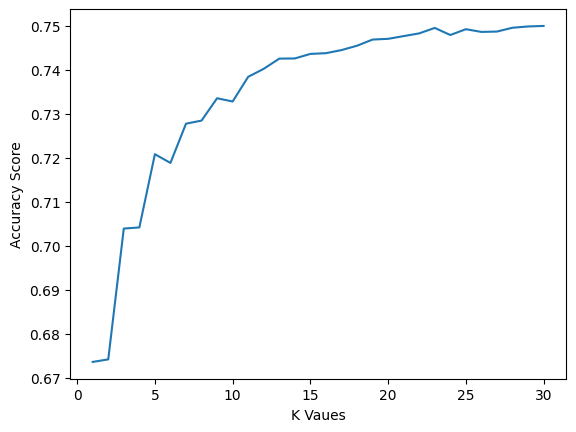

In [11]:
sns.lineplot(x = k_values, y = scores, markers= 'o')
plt.xlabel("K Vaues")
plt.ylabel("Accuracy Score")

In [12]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [13]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.7417423616845582
Precision: 0.7603890362511052
Recall: 0.7081103334705641
